# California Housing

In [56]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import math
import locale as locale
from money import Money
from sklearn import model_selection as model
from sklearn.linear_model import LinearRegression

locale.setlocale( locale.LC_ALL, '' )

%matplotlib inline

plt.rcParams['figure.figsize'] = (20, 10)
FONT_SIZE = 20

plt.rc('font', size=FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=FONT_SIZE)    # legend fontsize

transparency = 0.75

In [2]:
cal_housing = pd.read_csv('./cal_housing.data', header=None \
            , names=['longitude','latitude','housingMedianAge','totalRooms','totalBedrooms' \
                   , 'population','households','medianIncome','medianHouseValue']
)
cal_housing['id'] = (cal_housing.longitude * 1000) + (cal_housing.latitude)
cal_housing.head(n=3)
#cal_housing['id'].value_counts()
#cal_housing[cal_housing.id == -122372.20]

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,-122192.12
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,-122182.14
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,-122202.15


In [3]:
cal_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude           20640 non-null float64
latitude            20640 non-null float64
housingMedianAge    20640 non-null float64
totalRooms          20640 non-null float64
totalBedrooms       20640 non-null float64
population          20640 non-null float64
households          20640 non-null float64
medianIncome        20640 non-null float64
medianHouseValue    20640 non-null float64
id                  20640 non-null float64
dtypes: float64(10)
memory usage: 1.6 MB


In [4]:
cal_housing.describe()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue,id
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.898014,1425.476744,499.539680,3.870671,206855.816909,-119534.072596
std,2.003532,2.135952,12.585558,2181.615252,421.247906,1132.462122,382.329753,1.899822,115395.615874,2001.556850
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,-124309.460000
25%,-121.800000,33.930000,18.000000,1447.750000,295.000000,787.000000,280.000000,2.563400,119600.000000,-121760.830000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,-118455.985000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,-117975.900000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,-114275.810000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a10c9a908>,
      dtype=object)

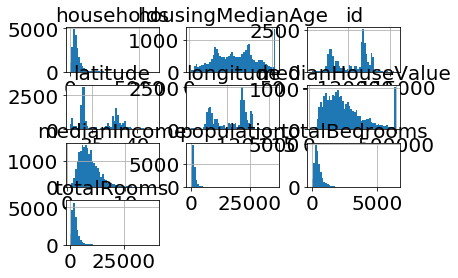

In [5]:
cal_housing.hist(bins=50)

In [27]:
trainSet, testSet = model.train_test_split(cal_housing, test_size=0.2, random_state=42)

In [30]:
testSet.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue,id,rooms_per_household,bedrooms_per_room,population_per_household
20046,-119.01,36.06,25.0,1505.0,367.0,1392.0,359.0,1.6812,47700.0,-118973.94,4.192201,0.243854,3.877437
3024,-119.46,35.14,30.0,2943.0,697.0,1565.0,584.0,2.5313,45800.0,-119424.86,5.039384,0.236833,2.679795
15663,-122.44,37.80,52.0,3830.0,1142.0,1310.0,963.0,3.4801,500001.0,-122402.20,3.977155,0.298172,1.360332
20484,-118.72,34.28,17.0,3051.0,505.0,1705.0,495.0,5.7376,218600.0,-118685.72,6.163636,0.165520,3.444444
9814,-121.93,36.62,34.0,2351.0,440.0,1063.0,428.0,3.7250,278000.0,-121893.38,5.492991,0.187154,2.483645


In [29]:
print(trainSet.info())
print()
print('*********************')
print()
print(testSet.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 13 columns):
longitude                   16512 non-null float64
latitude                    16512 non-null float64
housingMedianAge            16512 non-null float64
totalRooms                  16512 non-null float64
totalBedrooms               16512 non-null float64
population                  16512 non-null float64
households                  16512 non-null float64
medianIncome                16512 non-null float64
medianHouseValue            16512 non-null float64
id                          16512 non-null float64
rooms_per_household         16512 non-null float64
bedrooms_per_room           16512 non-null float64
population_per_household    16512 non-null float64
dtypes: float64(13)
memory usage: 1.8 MB
None

*********************

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 20046 to 3665
Data columns (total 13 columns):
longitude                   4128 non-null f

In [25]:
corr_matrix = cal_housing.corr()

In [26]:
corr_matrix['medianHouseValue'].sort_values(ascending=False)

medianHouseValue            1.000000
medianIncome                0.688075
rooms_per_household         0.151948
totalRooms                  0.134153
housingMedianAge            0.105623
households                  0.065843
totalBedrooms               0.050594
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
id                         -0.046166
latitude                   -0.144160
bedrooms_per_room          -0.255624
Name: medianHouseValue, dtype: float64

In [24]:
cal_housing['rooms_per_household'] = cal_housing['totalRooms'] / cal_housing['households']
cal_housing['bedrooms_per_room'] = cal_housing['totalBedrooms'] / cal_housing['totalRooms']
cal_housing['population_per_household'] = cal_housing['population'] / cal_housing['households']
cal_housing.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue,id,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,-122192.12,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,-122182.14,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,-122202.15,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,-122212.15,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,-122212.15,6.281853,0.172096,2.181467


In [45]:
housing = trainSet.drop('medianHouseValue', axis=1)
housingLabels = trainSet['medianHouseValue'].copy()
housing.sort_index().head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,id,rooms_per_household,bedrooms_per_room,population_per_household
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,-122182.14,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,-122202.15,8.288136,0.129516,2.802260
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,-122212.15,6.281853,0.172096,2.181467
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,-122212.15,4.761658,0.231774,2.139896
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,-122212.16,4.797527,0.221327,1.788253


In [46]:
housingLabels.sort_index().head()

1    358500.0
2    352100.0
4    342200.0
5    269700.0
7    241400.0
Name: medianHouseValue, dtype: float64

In [53]:
medianBedRooms = trainSet['totalBedrooms'].median()
medianBedRooms

437.0

In [55]:
trainSet[trainSet.isnull().any(axis=1)]

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue,id,rooms_per_household,bedrooms_per_room,population_per_household


In [58]:
linReg = LinearRegression()
linReg.fit(housing, housingLabels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
samples = housing.iloc[:5]
sampleLabels = housingLabels.iloc[:5]